In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, roc_curve, auc
%matplotlib inline

In [2]:
df = pd.read_csv(r'hog_features_df.csv')
df

,Unnamed: 0,hog_features_128*256_0,hog_features_128*256_1,hog_features_128*256_2,hog_features_128*256_3,hog_features_128*256_4,hog_features_128*256_5,hog_features_128*256_6,hog_features_128*256_7,hog_features_128*256_8,...,hog_features_128*256_16732,hog_features_128*256_16733,hog_features_128*256_16734,hog_features_128*256_16735,hog_features_128*256_16736,hog_features_128*256_16737,hog_features_128*256_16738,hog_features_128*256_16739,Usage,emotion
0,0,0.281217,0.033616,0.040695,0.281217,0.281217,0.124841,0.108124,0.057873,0.053786,...,0.004666,0.008852,0.000000,0.143968,0.013997,0.308249,0.308249,0.191816,Training,0
1,1,0.269421,0.007239,0.018313,0.007239,0.000000,0.000000,0.009157,0.000000,0.000000,...,0.003302,0.002088,0.003302,0.013289,0.000000,0.016706,0.033760,0.111433,Training,0
2,2,0.454875,0.029229,0.018486,0.000000,0.013072,0.000000,0.009243,0.000000,0.041336,...,0.000000,0.092485,0.198702,0.121465,0.079314,0.000000,0.000000,0.000000,Training,0
3,3,0.277110,0.000000,0.003797,0.000000,0.001342,0.000000,0.001899,0.000000,0.020316,...,0.360558,0.008889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Training,0
4,4,0.364623,0.364623,0.085779,0.000000,0.012131,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.032024,0.000000,0.076990,0.000000,0.096522,0.157754,0.374154,Training,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6482,6482,0.332745,0.193362,0.104822,0.000000,0.086474,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.065202,0.000000,0.119872,0.292757,0.307072,PublicTest,6
6483,6483,0.375228,0.000000,0.000000,0.000000,0.019002,0.000000,0.000000,0.014619,0.235773,...,0.000000,0.033954,0.015142,0.133630,0.148234,0.320207,0.084310,0.055625,PublicTest,6
6484,6484,0.386641,0.026025,0.020548,0.000000,0.007265,0.000000,0.007705,0.008122,0.056727,...,0.110920,0.046768,0.000000,0.099210,0.000000,0.163689,0.000000,0.000000,PublicTest,6
6485,6485,0.420860,0.000000,0.000000,0.000000,0.002141,0.000000,0.000000,0.000000,0.027913,...,0.000000,0.000000,0.000000,0.168382,0.078821,0.218504,0.293345,0.187165,PublicTest,6


In [3]:
num_samples = df.shape[0]

indices = np.arange(num_samples)
np.random.shuffle(indices)
shuffled_data = df.iloc[indices]
shuffled_data

,Unnamed: 0,hog_features_128*256_0,hog_features_128*256_1,hog_features_128*256_2,hog_features_128*256_3,hog_features_128*256_4,hog_features_128*256_5,hog_features_128*256_6,hog_features_128*256_7,hog_features_128*256_8,...,hog_features_128*256_16732,hog_features_128*256_16733,hog_features_128*256_16734,hog_features_128*256_16735,hog_features_128*256_16736,hog_features_128*256_16737,hog_features_128*256_16738,hog_features_128*256_16739,Usage,emotion
772,772,0.379830,0.016877,0.005337,0.000000,0.015096,0.000000,0.000000,0.000000,0.165079,...,0.055602,0.021952,0.000000,0.004960,0.000000,0.000000,0.000000,0.229620,PublicTest,0
2401,2401,0.529668,0.214067,0.000000,0.000000,0.100512,0.000000,0.000000,0.014601,0.000000,...,0.309424,0.144512,0.020772,0.065027,0.000000,0.000000,0.000000,0.000000,PublicTest,2
321,321,0.058183,0.000000,0.058774,0.359444,0.359444,0.000000,0.000000,0.000000,0.000000,...,0.056887,0.085091,0.037523,0.040753,0.000000,0.000000,0.000000,0.000000,Training,0
5246,5246,0.473439,0.000000,0.008230,0.000000,0.023277,0.000000,0.016459,0.013012,0.473439,...,0.090778,0.169845,0.023560,0.071268,0.020926,0.011629,0.038124,0.000000,PrivateTest,5
2972,2972,0.231827,0.000000,0.000000,0.000000,0.103479,0.083651,0.169547,0.395723,0.140499,...,0.016037,0.102822,0.341351,0.094877,0.000000,0.000000,0.000000,0.000000,Training,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3431,3431,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,PublicTest,3
2500,2500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.052586,0.000000,0.000000,0.010428,0.000000,0.000000,0.000000,0.000000,PublicTest,2
4010,4010,0.397074,0.000000,0.000000,0.000000,0.019980,0.000000,0.000000,0.000000,0.397074,...,0.176864,0.139823,0.022108,0.168079,0.000000,0.055929,0.022108,0.000000,Training,4
5857,5857,0.004450,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.002864,0.000000,0.010125,0.032762,0.067560,0.215973,0.212506,Training,6


In [4]:
# Assuming df, X, and y are already defined

X = shuffled_data.iloc[:, 2:-2].values
y = shuffled_data.iloc[:, -1].values

In [5]:
# Split the data

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [6]:
# Standardize the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Apply K-means clustering on the training set
num_clusters = 34
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
y_train_pred = kmeans.fit_predict(X_train_scaled)

c:\Users\user\Anaconda3\envs\pythonConda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
# Predict clusters on the validation and test sets

y_val_pred = kmeans.predict(X_val_scaled)
y_test_pred = kmeans.predict(X_test_scaled)

In [35]:
# Assign cluster labels to classes based on majority voting

def assign_labels(y_true, y_pred):
    cluster_to_label = {}
    for cluster in set(y_pred):
        mask = (y_pred == cluster)
        labels_in_cluster = y_true[mask]
        majority_label = max(set(labels_in_cluster), key=list(labels_in_cluster).count)
        cluster_to_label[cluster] = majority_label
    return [cluster_to_label[cluster] for cluster in y_pred]

In [36]:
# Assign labels to validation and test sets

y_val_assigned = assign_labels(y_val, y_val_pred)
y_test_assigned = assign_labels(y_test, y_test_pred)

In [37]:
# Evaluate accuracy on the validation and test sets
accuracy_val = accuracy_score(y_val, y_val_assigned)
accuracy_test = accuracy_score(y_test, y_test_assigned)

print(f"Accuracy on Validation Set: {accuracy_val * 100:.2f}%")
print(f"Accuracy on Test Set: {accuracy_test * 100:.2f}%")

Accuracy on Validation Set: 28.26%
Accuracy on Test Set: 27.00%


c:\Users\Alaa Osman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Alaa Osman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Alaa Osman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Alaa Osman\AppData\Local\Programs\Python\Python310\lib\site-p

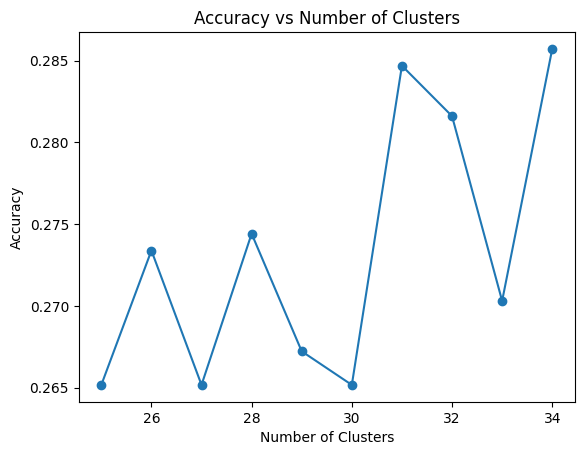

In [13]:
accuracy_values = []


cluster_range = range(25, 35)

for num_clusters in cluster_range:
    # Apply K-means clustering on the training set
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    y_train_pred = kmeans.fit_predict(X_train_scaled)

    # Predict clusters on the validation set
    y_val_pred = kmeans.predict(X_val_scaled)

    # Assign cluster labels to validation set based on majority voting
    y_val_assigned = assign_labels(y_val, y_val_pred)

    # Evaluate accuracy on the validation set
    accuracy_val = accuracy_score(y_val, y_val_assigned)


    accuracy_values.append(accuracy_val)


plt.plot(cluster_range, accuracy_values, marker='o')
plt.title('Accuracy vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Accuracy')
plt.show()

c:\Users\Alaa Osman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Alaa Osman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Alaa Osman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Alaa Osman\AppData\Local\Programs\Python\Python310\lib\site-p

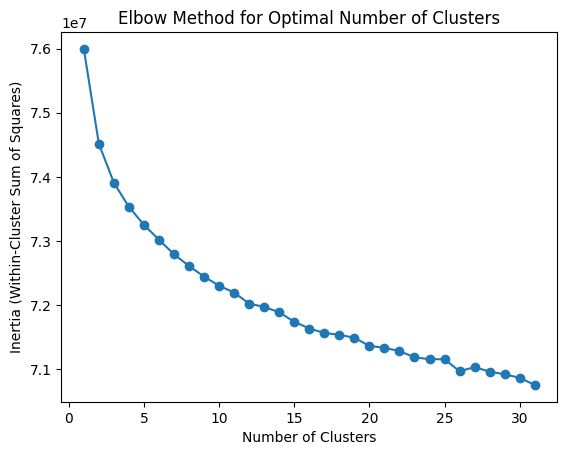

In [19]:
num_clusters_range = range(1, 35)
inertia_values = []

for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_train_scaled)
    inertia_values.append(kmeans.inertia_)


plt.plot(num_clusters_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

c:\Users\user\Anaconda3\envs\pythonConda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


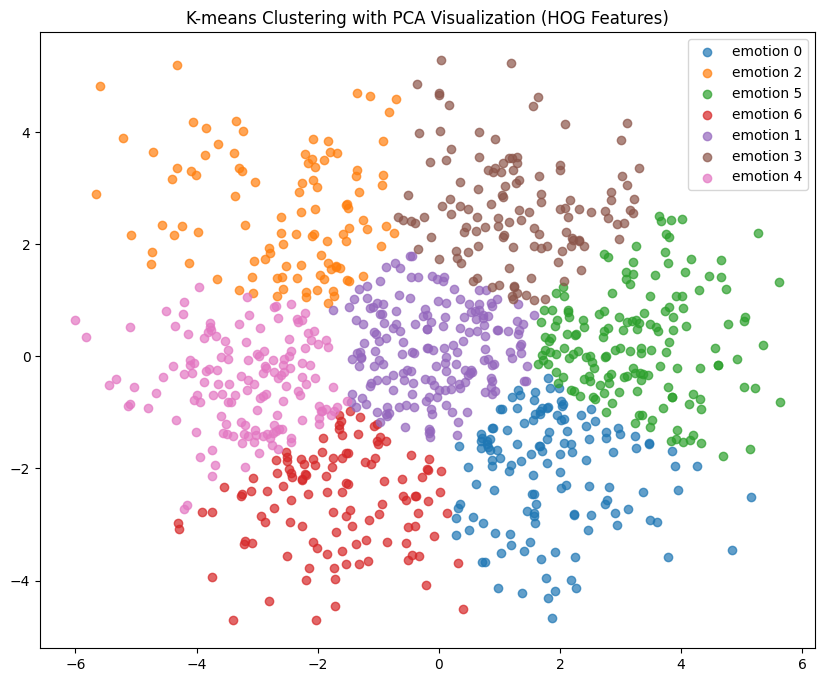

In [17]:
pca = PCA(n_components=2)
X_train_pca_hog = pca.fit_transform(X_train)
X_val_pca_hog = pca.transform(X_val)
X_test_pca_hog = pca.transform(X_test)

# Apply K-means clustering on the PCA-transformed training set
num_clusters = 7  # or adjust as needed
kmeans_hog = KMeans(n_clusters=num_clusters, random_state=42)
y_train_pred_hog = kmeans_hog.fit_predict(X_train_pca_hog)

# Predict clusters on the PCA-transformed validation and test sets
y_val_pred_hog = kmeans_hog.predict(X_val_pca_hog)
y_test_pred_hog = kmeans_hog.predict(X_test_pca_hog)

# Create a new DataFrame with the PCA components and labels for visualization
pca_vis_df_hog = pd.DataFrame(data=X_val_pca_hog, columns=['PCA1', 'PCA2'])
pca_vis_df_hog['Cluster'] = y_val_pred_hog

# Visualize the scatter plot
plt.figure(figsize=(10, 8))
for cluster in pca_vis_df_hog['Cluster'].unique():
    subset = pca_vis_df_hog[pca_vis_df_hog['Cluster'] == cluster]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'emotion {cluster}', alpha=0.7)

plt.title('K-means Clustering with PCA Visualization (HOG Features)')
plt.legend()
plt.show()